# TimeSeries for CSI Data

In [291]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import datetime
import seaborn as sns
import os
import IPython
import IPython.display

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [292]:
# Loading dataset
df = pd.read_csv('./CSI_Preprocessing/output/csi_outputs.csv', header=0, parse_dates=True, squeeze=True)
df.head()

,time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_54,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_62,Subcar_63
0,1625554196,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,224.555116,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592
1,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,224.804359,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592
2,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,238.415604,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592
3,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,265.414770,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592
4,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,233.540146,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592


In [293]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1095 non-null   int64  
 1   Subcar_0            1095 non-null   float64
 2   Subcar_1            1095 non-null   float64
 3   Subcar_2            1095 non-null   float64
 4   Subcar_3            1095 non-null   float64
 5   Subcar_4            1095 non-null   float64
 6   Subcar_5            1095 non-null   float64
 7   Subcar_6            1095 non-null   float64
 8   Subcar_7            1095 non-null   float64
 9   Subcar_8            1095 non-null   float64
 10  Subcar_9            1095 non-null   float64
 11  Subcar_10           1095 non-null   float64
 12  Subcar_11           1095 non-null   float64
 13  Subcar_12           1095 non-null   float64
 14  Subcar_13           1095 non-null   float64
 15  Subcar_14           1095 non-null   float64
 16  Subcar

In [294]:
# creating a dataframe from the csv file
data_1 = pd.DataFrame(pd.read_csv('./CSI_Preprocessing/output/csi_outputs.csv'))
  
# unit='s' to convert it into epoch time
data_1['time'] = pd.to_datetime(data_1['time'],
                                  unit='s')
  
date_time= data_1['time'].dt.strftime('%d-%m-%Y %H:%M')
  
# checking our dataframe once again
data_1.head()

,time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_54,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_62,Subcar_63
0,2021-07-06 06:49:56,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,224.555116,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592
1,2021-07-06 06:49:57,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,224.804359,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592
2,2021-07-06 06:49:57,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,238.415604,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592
3,2021-07-06 06:49:57,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,265.414770,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592
4,2021-07-06 06:49:57,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,233.540146,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592


In [295]:
data_1.loc[0, 'time']

Timestamp('2021-07-06 06:49:56')

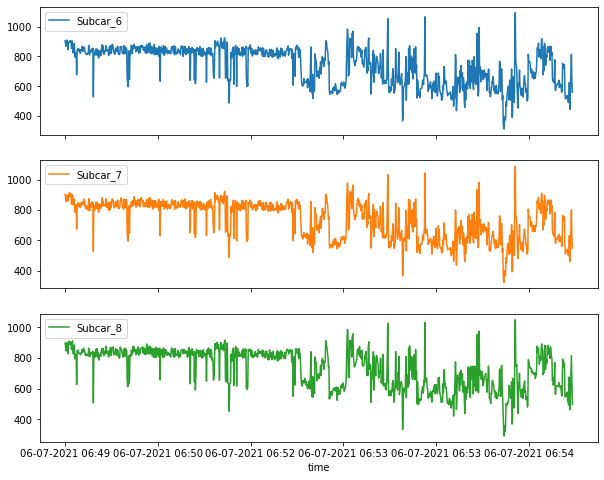

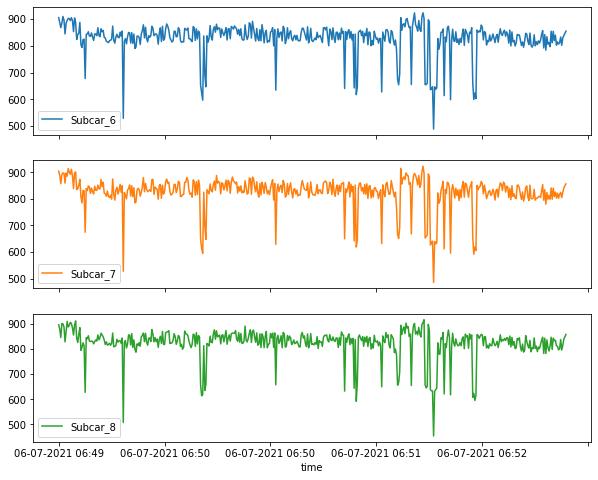

In [296]:
plot_cols = ['Subcar_6', 'Subcar_7', 'Subcar_8']
plot_features = data_1[plot_cols]
plot_features.index =date_time
_ = plot_features.plot(subplots=True)

plot_features = data_1[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [297]:
data_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Subcar_0,1095.0,4343.844617,1.858802e+01,4343.049850,4343.049850,4343.049850,4343.049850,4778.184592
Subcar_1,1095.0,11550.056536,4.883431e+02,4343.049850,11583.116200,11583.116200,11583.116200,11583.116200
Subcar_2,1095.0,6565.356200,2.147401e+02,6556.174571,6556.174571,6556.174571,6556.174571,11583.116200
Subcar_3,1095.0,9437.493860,1.233090e+02,6556.174571,9442.766173,9442.766173,9442.766173,9442.766173
Subcar_4,1095.0,724.622533,5.414983e+02,239.770724,592.670226,736.698717,789.479225,9442.766173
...,...,...,...,...,...,...,...,...
Subcar_59,1095.0,215.986306,1.506013e+02,11.401754,96.586746,152.554908,330.191578,1003.594041
Subcar_60,1095.0,214.708752,1.429559e+02,2.000000,101.294124,175.282629,316.311551,973.151581
Subcar_61,1095.0,226.199879,1.352786e+02,7.211103,124.062454,203.066492,310.642065,943.019088
Subcar_62,1095.0,2140.686718,1.122537e+02,0.000000,2146.567725,2146.567725,2146.567725,2146.567725


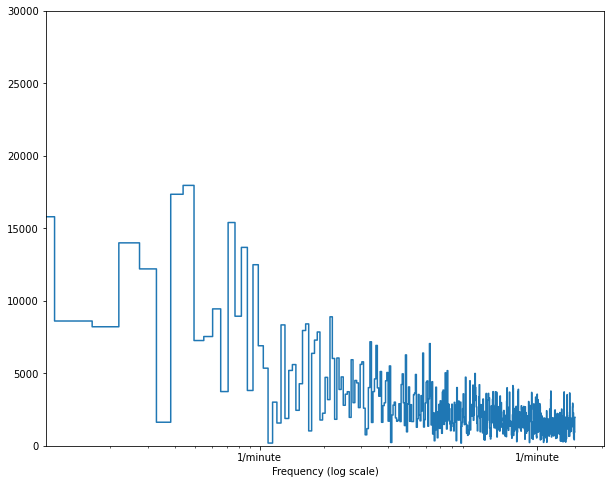

In [298]:
fft = tf.signal.rfft(data_1['Subcar_7'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(data_1['Subcar_7'])
minute_per_hour = 1*60
day_per_dataset = n_samples_h/(minute_per_hour)

f_per_year = f_per_dataset/day_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 30000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 20], labels=['1/minute', '1/minute'])
_ = plt.xlabel('Frequency (log scale)')

In [299]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('Subcar%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('Subcar%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('Subcar%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [305]:
data_2 = pd.DataFrame(pd.read_csv('./CSI_Preprocessing/output/csi_outputs.csv', header=0, index_col=0))
values = data_2.values

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   Subcar1(t-1)  Subcar2(t-1)  Subcar3(t-1)  Subcar4(t-1)  Subcar5(t-1)  \
1           0.0           1.0           0.0           1.0      0.983456   
2           0.0           1.0           0.0           1.0      0.956801   
3           0.0           1.0           0.0           1.0      0.934743   
4           0.0           1.0           0.0           1.0      0.799632   
5           0.0           1.0           0.0           1.0      0.982537   

   Subcar6(t-1)  Subcar7(t-1)  Subcar8(t-1)  Subcar9(t-1)  Subcar17(t-1)  ...  \
1      0.769321      0.759545      0.758480      0.797183       0.881052  ...   
2      0.733601      0.734952      0.738693      0.775226       0.781604  ...   
3      0.716845      0.711405      0.697326      0.730703       0.814710  ...   
4      0.705160      0.732726      0.741296      0.803353       0.834367  ...   
5      0.765202      0.765173      0.749681      0.802085       0.874018  ...   

   Subcar54(t)  Subcar55(t)  Subcar56(t)  Subcar57(t)  Subcar5

In [306]:
# split into train and test sets
values = reframed.values
n_train_hours = 60 * 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print('Training:',train_X.shape)
print('Testing:',test_X.shape)
print('Train_y:', train_y.shape)
print('Test_y:',test_y.shape )

Training: (1094, 1, 118)
Testing: (0, 1, 118)
Train_y: (1094,)
Test_y: (0,)


Epoch 1/50
547/547 - 0s - loss: 0.0134
Epoch 2/50
547/547 - 0s - loss: 0.0054
Epoch 3/50
547/547 - 0s - loss: 0.0031
Epoch 4/50
547/547 - 0s - loss: 0.0019
Epoch 5/50
547/547 - 0s - loss: 0.0013
Epoch 6/50
547/547 - 0s - loss: 8.2881e-04
Epoch 7/50
547/547 - 0s - loss: 8.8123e-04
Epoch 8/50
547/547 - 0s - loss: 5.3588e-04
Epoch 9/50
547/547 - 0s - loss: 3.5880e-04
Epoch 10/50
547/547 - 0s - loss: 3.0525e-04
Epoch 11/50
547/547 - 0s - loss: 3.3523e-04
Epoch 12/50
547/547 - 0s - loss: 2.9684e-04
Epoch 13/50
547/547 - 0s - loss: 2.9893e-04
Epoch 14/50
547/547 - 0s - loss: 2.4516e-04
Epoch 15/50
547/547 - 0s - loss: 1.8174e-04
Epoch 16/50
547/547 - 0s - loss: 1.9416e-04
Epoch 17/50
547/547 - 0s - loss: 1.7767e-04
Epoch 18/50
547/547 - 0s - loss: 1.3821e-04
Epoch 19/50
547/547 - 0s - loss: 1.1742e-04
Epoch 20/50
547/547 - 0s - loss: 1.8710e-04
Epoch 21/50
547/547 - 0s - loss: 1.6375e-04
Epoch 22/50
547/547 - 0s - loss: 1.2363e-04
Epoch 23/50
547/547 - 0s - loss: 1.2528e-04
Epoch 24/50
547/5

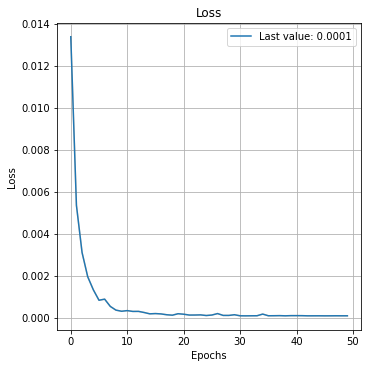

In [312]:
# design network
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history

from plot_keras_history import plot_history
plot_history(history)
plt.show()